# Analysis of Covariate Shift Tuning

In [1]:
# Load libraries
import pandas as pd
import numpy as np

import pickle
import os

import matplotlib.pyplot as plt

In [2]:
# Function for loading pickle files
def load_pickle(fname):
    with open(fname, 'rb') as handle:
        return pickle.load(handle)

In [3]:
# Load data
data_path = './cs_weights_v0/'
results = []
for f in sorted(os.listdir(data_path)):
    results.append(load_pickle(data_path + f))

## Taking a look at impact of slight changes in gaussian width...

In [4]:
key_100nk = np.zeros(len(results))
for idx, result in enumerate(results):
    if result['num_kernels'] == 100:
        key_100nk[idx] = result['width']

In [5]:
key_100nk

array([ 110.,  100.,   90.,  500., 1000.,   50.,   10.])

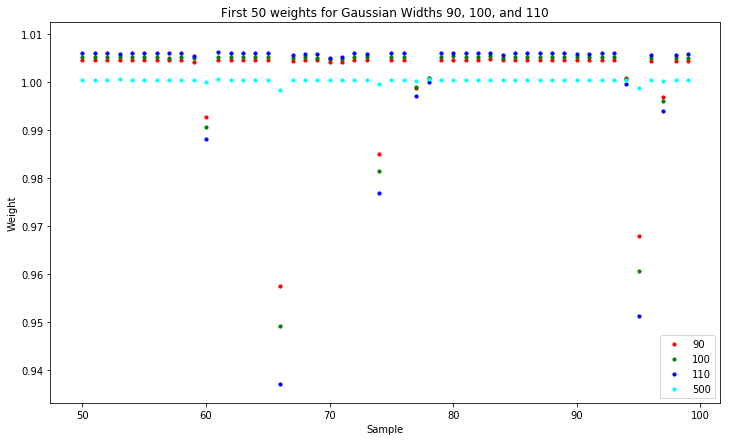

In [6]:
selected_elems = [90, 100, 110, 500]
colors = ['red', 'green', 'blue', 'cyan']
start = 50
stop = 100
x_range = list(range(start, stop))
# Generate graphics
plt.figure(figsize=(12, 7))
for idx, elem in enumerate(selected_elems):
    target_idx = np.where(key_100nk==90)[0][0]
    plt.scatter(x_range, results[idx]['weights'][start:stop], color=colors[idx], label=str(elem), s=10)
plt.title('First 50 weights for Gaussian Widths 90, 100, and 110')
plt.xlabel('Sample')
plt.ylabel('Weight')
plt.legend(loc='lower right')
plt.show()